OK

In [2]:
%pip install scikit-learn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'data.csv' with your actual dataset file
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset
data.head()


,temperature,pressure,h2_production
0,900.0,10.000000,2.079956
1,900.0,10.306122,2.079954
2,900.0,10.612245,2.079953
3,900.0,10.918367,2.079951
4,900.0,11.224490,2.079950


In [4]:
# Step 2: Define features and target variable
# Assuming the columns are named 'temperature', 'pressure', and 'h2_production'
X = data[['temperature', 'pressure']]
y = data['h2_production']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 4: Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gbr.predict(X_test)


In [6]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.773028173213195e-10
R^2 Score: 0.999989594466405


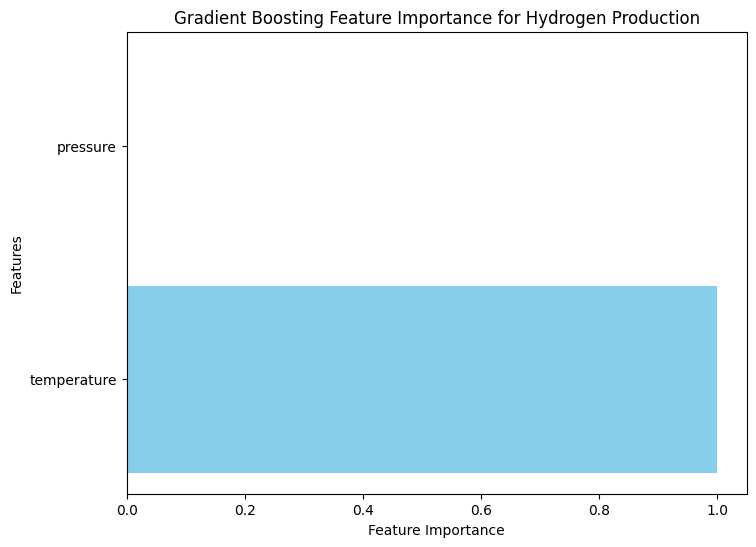

In [7]:
# Step 7: Plot feature importance
feature_importance = gbr.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Feature Importance for Hydrogen Production')
plt.show()


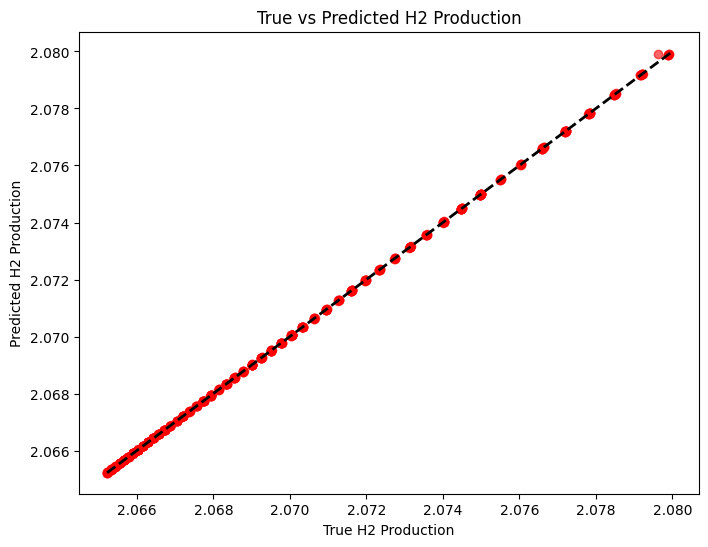

In [8]:
# Step 8: Visualize True vs. Predicted H2 Production
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True H2 Production')
plt.ylabel('Predicted H2 Production')
plt.title('True vs Predicted H2 Production')
plt.show()
